<a href="https://colab.research.google.com/github/mark-morelos/DS-Unit-1-Sprint-2-Statistics/blob/master/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
from scipy.stats import ttest_ind, ttest_1samp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load the data and check errors
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
cong_votes = pd.read_csv(url)
print(cong_votes.shape)
cong_votes.head()

(434, 17)


,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [21]:
# add column headers and change '?' values to NaN
column_headers = ['party', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution',
                  'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban',
                  'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending',
                  'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
cong_votes = pd.read_csv(url, header=None, names=column_headers, na_values='?')
print(cong_votes.shape)
cong_votes.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [22]:
# recode votes as numeric
cong_votes = cong_votes.replace(({'y':1, 'n':0}))
cong_votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [7]:
# check for null values
cong_votes.isnull().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
## CONFIDENCE INTERVAL
# bring in tthe stats module
import scipy.stats as stats

In [0]:
def conf_int(data, confidence=0.95):
  mydata = np.array(data)
  mymean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1)/np.sqrt(n)
  margin = stderr*stats.t.ppf((1 + confidence)/2, n-1)
  return (mymean, mymean - margin, mymean + margin)

In [28]:
# what's the confidence interval Immigration issue votes?
# clean up 'immigration' data
imm_votes = cong_votes['immigration'].dropna()
imm_votes

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
429    1.0
430    1.0
431    1.0
432    0.0
434    1.0
Name: immigration, Length: 428, dtype: float64

In [27]:
imm_votes.mean()

0.5046728971962616

In [29]:
conf_int(imm_votes)

(0.5046728971962616, 0.4571155174657166, 0.5522302769268066)

In [30]:
# graphically represent the confidence interval
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


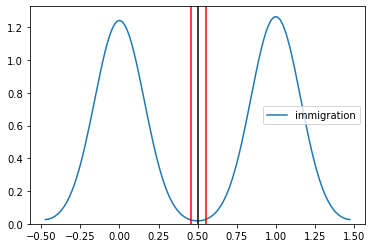

In [32]:
sns.kdeplot(imm_votes)
CI = conf_int(imm_votes)
plt.axvline(x=CI[1], color='red');
plt.axvline(x=CI[2], color='red');
plt.axvline(x=CI[0], color='black');

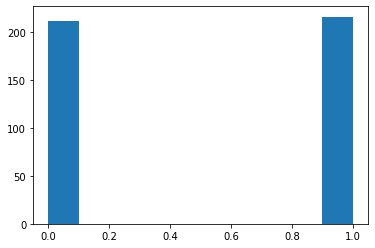

In [33]:
plt.hist(imm_votes);

In [0]:
# Interpret the confidence interval - 
# what does it tell you about the data and its distribution?
# Confidence interval is between 45% - 55% that the immigration issue will be passed or voted as 'yes'

In [34]:
## CHI SQUARED TEST
url2 = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url2)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [35]:
# display cabin class (cat var) as another value to categorize
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


In [37]:
# check numeric columns
titanic.describe()

,Survived,Pclass,Age,Fare
count,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,34.567251
std,0.491139,0.836854,14.492933,52.938648
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,2.000000,28.000000,15.645850
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,80.000000,512.329200


In [38]:
# check the categorical columns
titanic.describe(exclude='number')

,Sex,Embarked,cabin_class
count,712,712,712
unique,2,3,3
top,male,Southampton,third
freq,453,554,355


In [39]:
# check category count for 'cabin_class'
titanic['cabin_class'].value_counts().sort_index()

first     184
second    173
third     355
Name: cabin_class, dtype: int64

In [41]:
titanic['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [42]:
# create a crosstab
xtab = pd.crosstab(titanic['cabin_class'], titanic['Sex'])
xtab

Sex,female,male
cabin_class,,
first,83,101
second,74,99
third,102,253


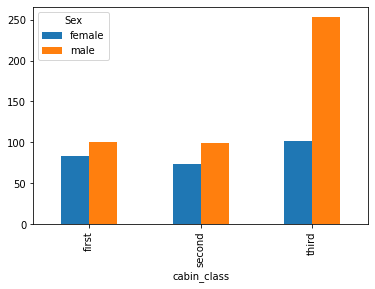

In [43]:
# bar chart
xtab.plot(kind='bar');

In [44]:
xtab = pd.crosstab(titanic['Sex'], titanic['cabin_class'], margins=True)
xtab

cabin_class,first,second,third,All
Sex,,,,
female,83,74,102,259
male,101,99,253,453
All,184,173,355,712


In [47]:
# row sums
row_sums = xtab.iloc[0:2, 3].values
row_sums

array([259, 453])

In [48]:
# col sums
col_sums = xtab.iloc[2][0:3].values
col_sums

array([184, 173, 355])

In [49]:
total = xtab.loc['All', 'All']
total

712

In [50]:
# expected values
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)

,0,1,2
0,66.932584,62.93118,129.136236
1,117.067416,110.06882,225.863764


In [51]:
xtab

cabin_class,first,second,third,All
Sex,,,,
female,83,74,102,259
male,101,99,253,453
All,184,173,355,712


In [52]:
observed = pd.crosstab(titanic['Sex'], titanic['cabin_class']).values
pd.DataFrame(observed)

,0,1,2
0,83,74,102
1,101,99,253


In [53]:
# Chi-Squared Statistic with Numpy
chi_squared = ((observed - expected)**2/(expected)).sum()
chi_squared

18.08484036123574

In [54]:
# degrees of freedom
dof = (len(row_sums)-1)*(len(col_sums)-1)
dof

2

In [55]:
# chi-squared using Scipy
stats.chi2_contingency(observed)

(18.08484036123574,
 0.00011828422058509222,
 2,
 array([[ 66.93258427,  62.93117978, 129.13623596],
        [117.06741573, 110.06882022, 225.86376404]]))

In [56]:
print('stat', stats.chi2_contingency(observed)[0])
print('pvalue', stats.chi2_contingency(observed)[1])
print('dof', stats.chi2_contingency(observed)[2])
pd.DataFrame(stats.chi2_contingency(observed)[3])

stat 18.08484036123574
pvalue 0.00011828422058509222
dof 2


,0,1,2
0,66.932584,62.93118,129.136236
1,117.067416,110.06882,225.863764


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)